# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BMCS2123 Natural Language Processing Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Language Processing for Sentiment Analysis : Unveiling Customer Voices of Shopee Reviews and Comments</p>

<p style="text-align:center; ">
<img src="https://bigblue.academy/images/image/blog/sentiment-analysis/group-153.jpg" style='width: 600px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries & Packages</p>

In [91]:
# pip install nltk

In [92]:
# pip install PySastrawi

In [93]:
# pip install pycountry

In [94]:
# pip install Langdetect

In [95]:
# pip install wordcloud

In [96]:
# pip install demoji

In [97]:
# pip install contractions

In [98]:
# pip install tensorflow

In [99]:
# pip install textblob

In [100]:
import pandas as pd
import nltk
import seaborn as sns #Kenneth
import matplotlib.pyplot as plt
import string
import demoji
import contractions
import time

from langdetect import detect,detect_langs #pip install langdetect (Kenneth)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [101]:
# https://shopee.com.my/-READY-STOCK-BAJU-MELAYU-SLIM-FIT-DEWASA-DAN-BUDAK-(kain-sating)-RAYA-2024-i.310588344.24263963059?sp_atk=287c391c-faaa-41a1-82f2-7256758aae1e&xptdk=287c391c-faaa-41a1-82f2-7256758aae1e
# https://shopee.com.my/SALE-!!!!Baju-Melayu-Slimfit-dan-Regular-Warna-Cream-i.45909008.4503941744?sp_atk=8aaff726-92bd-4a36-a751-26b59408ed33&xptdk=8aaff726-92bd-4a36-a751-26b59408ed33


# Define file paths
data  = "dataset1.csv"
data2 = "dataset2.csv"

# Read CSV files into DataFrames
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2, encoding='latin1')

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.to_csv("merged_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [102]:
combined_df.describe()


,No.,Rating
count,466.000000,466.000000
mean,217.532189,3.343348
std,133.931229,1.471642
min,1.000000,1.000000
25%,101.250000,2.000000
50%,217.500000,3.000000
75%,333.750000,5.000000
max,450.000000,5.000000


In [103]:
combined_df.head() # print the data from head

,No.,Author,Rating,Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [104]:
combined_df.tail() # print the data from head

,No.,Author,Rating,Review
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
462,13,khaynurul,5,NaN
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak
464,15,acikmaira,1,Ukuran tak sama saiz besar
465,16,fvxmwlvyq7,5,NaN


In [105]:
combined_df[:2].isnull()

,No.,Author,Rating,Review
0,False,False,False,False
1,False,False,False,False


In [106]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     466 non-null    int64 
 1   Author  466 non-null    object
 2   Rating  466 non-null    int64 
 3   Review  462 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.7+ KB


- Lowercase
- Stemming / Lemmatisation
- Stopword Removal
- Normalization
- Text Enrichment (POS Tagging, Augmentation)
- Noice Removal (Remove Emoji)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Transformation</p>

In [107]:
# Get the column variable
combined_df.columns

Index(['No.', 'Author', 'Rating', 'Review'], dtype='object')

In [108]:
combined_df.columns = ['No','Author','Product Rating','Product Review']

In [109]:
combined_df.head()

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Handling Missing Value</p>

In [110]:
combined_df.isnull().any().any()

True

In [111]:
# Test if missing value exist
combined_df.isna().any()

No                False
Author            False
Product Rating    False
Product Review     True
dtype: bool


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Missing Value</p>

In [112]:
# Drop rows with empty reviews
combined_df = combined_df.dropna(subset=['Product Review'])


In [113]:
missing_values = combined_df.isnull()

missing_count_per_column = missing_values.sum()

print("Missing values per column:")
print(missing_count_per_column)

if missing_values.any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nThere are no missing values in the data.")


Missing values per column:
No                0
Author            0
Product Rating    0
Product Review    0
dtype: int64

There are no missing values in the data.


In [114]:
combined_df.to_csv('clean_dataset.csv', index=False)

In [115]:
combined_df.head()

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [116]:
combined_df.isnull().any().any() #check missing value

False

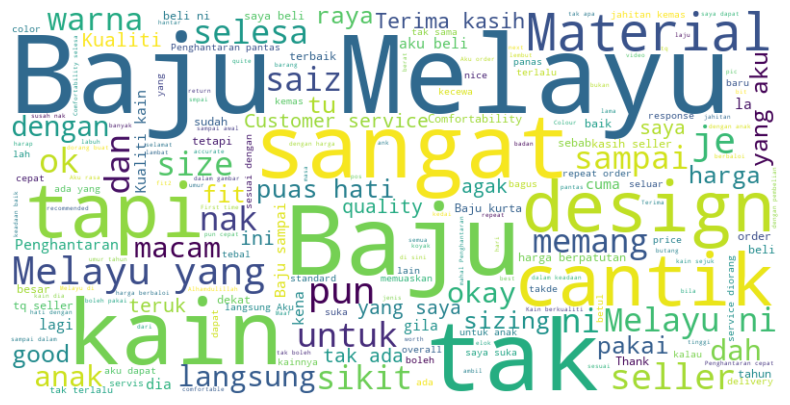

In [117]:
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_df['Product Review']]
reviews_text = ' '.join(cleaned_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [118]:
combined_df

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...
...,...,...,...,...
458,9,s*****a,3,Pada baju ada warna merah\nCuba basuh masih x ...
460,11,*****n,2,Colour a bit different from the picture. And m...
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">EDA</p>

In [119]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Product Review','Product Rating']
combined_df = combined_df[selected_columns]

# Display the new DataFrame
print(combined_df)

                                        Product Review  Product Rating
0    baju kurta sampai dalam keadaan baik, tapi tak...               3
1    Sizing tak accurate langsung, aku rasa macam b...               2
2    Baju kurta aku dah koyak sebelum pakai, memang...               2
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5
4    Baju selamat mendarat kain cantik dan sedap di...               5
..                                                 ...             ...
458  Pada baju ada warna merah\nCuba basuh masih x ...               3
460  Colour a bit different from the picture. And m...               2
461  Warna nude kita mintak warna lain yg Smpai lpa...               1
463                   tidak mengikuti saiz yg saya nak               5
464                         Ukuran tak sama saiz besar               1

[462 rows x 2 columns]


In [120]:
# case folding and lowercasing
def casefolding(Review):
    Review = Review.lower()
    return Review
combined_df['LowerCaseReview'] = combined_df['Product Review'].apply(casefolding)
combined_df

,Product Review,Product Rating,LowerCaseReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b..."
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang..."
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...
...,...,...,...
458,Pada baju ada warna merah\nCuba basuh masih x ...,3,pada baju ada warna merah\ncuba basuh masih x ...
460,Colour a bit different from the picture. And m...,2,colour a bit different from the picture. and m...
461,Warna nude kita mintak warna lain yg Smpai lpa...,1,warna nude kita mintak warna lain yg smpai lpa...
463,tidak mengikuti saiz yg saya nak,5,tidak mengikuti saiz yg saya nak


In [121]:
remove = set(string.punctuation)

def remove_punctuation(text):
    return ' '.join(word.strip(''.join(remove)) for word in text.split())

# Apply the function to the 'Review_Lcase' column
combined_df['RemovedPuncReview'] = combined_df['LowerCaseReview'].apply(remove_punctuation)

# Display the updated DataFrame
combined_df

,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...
...,...,...,...,...
458,Pada baju ada warna merah\nCuba basuh masih x ...,3,pada baju ada warna merah\ncuba basuh masih x ...,pada baju ada warna merah cuba basuh masih x h...
460,Colour a bit different from the picture. And m...,2,colour a bit different from the picture. and m...,colour a bit different from the picture and mo...
461,Warna nude kita mintak warna lain yg Smpai lpa...,1,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...
463,tidak mengikuti saiz yg saya nak,5,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak


In [122]:
import re  # Add this line to import the 're' module

# Define the function to remove special characters
def remove_special_characters(text):
    # Using regular expression to keep only alphanumeric characters and spaces
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'Review_Lcase' column
combined_df['RemovedSpecialCharReview'] = combined_df['RemovedPuncReview'].apply(remove_special_characters)

# Display the first few rows
combined_df.head()


,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [123]:
combined_df['RemovedSpecialCharReview'] = combined_df['RemovedSpecialCharReview'].astype(str)

combined_df['DemojiReview'] = combined_df['RemovedSpecialCharReview'].apply(lambda x: demoji.replace(x, ''))

# Display the updated DataFrame
combined_df


,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...
...,...,...,...,...,...,...
458,Pada baju ada warna merah\nCuba basuh masih x ...,3,pada baju ada warna merah\ncuba basuh masih x ...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...
460,Colour a bit different from the picture. And m...,2,colour a bit different from the picture. and m...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...
461,Warna nude kita mintak warna lain yg Smpai lpa...,1,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...
463,tidak mengikuti saiz yg saya nak,5,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak


In [124]:
# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
combined_df['ContractionReview'] = combined_df['DemojiReview'].apply(expand_contractions)

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Tokenization</p>

In [125]:
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(word_tokenize_wrapper)
combined_df.head()

,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,"[baju, kurta, sampai, dalam, keadaan, baik, ta..."
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,"[sizing, tak, accurate, langsung, aku, rasa, m..."
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,"[baju, kurta, aku, dah, koyak, sebelum, pakai,..."
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,"[delivery, laju, kain, cantik, thanks, seller,..."
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,"[baju, selamat, mendarat, kain, cantik, dan, s..."


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Lemmatization</p>

In [126]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
#nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to each tokenized list in 'ContractionReview' column
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(lemmatize_tokens)

# Reconstruct sentences from lemmatized tokens
combined_df['lemma_review'] = combined_df['ContractionReview'].apply(lambda tokens: ' '.join(tokens))

combined_df[['Product Review','ContractionReview','lemma_review']].head(20)

,Product Review,ContractionReview,lemma_review
0,"baju kurta sampai dalam keadaan baik, tapi tak...","[baju, kurta, sampai, dalam, keadaan, baik, ta...",baju kurta sampai dalam keadaan baik tapi tak ...
1,"Sizing tak accurate langsung, aku rasa macam b...","[sizing, tak, accurate, langsung, aku, rasa, m...",sizing tak accurate langsung aku rasa macam ba...
2,"Baju kurta aku dah koyak sebelum pakai, memang...","[baju, kurta, aku, dah, koyak, sebelum, pakai,...",baju kurta aku dah koyak sebelum pakai memang ...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,"[delivery, laju, kain, cantik, thanks, seller,...",delivery laju kain cantik thanks seller masih ...
4,Baju selamat mendarat kain cantik dan sedap di...,"[baju, selamat, mendarat, kain, cantik, dan, s...",baju selamat mendarat kain cantik dan sedap di...
5,Baju cantik. Pos dalam 4hri Kualiti okay la. T...,"[baju, cantik, po, dalam, 4hri, kualiti, okay,...",baju cantik po dalam 4hri kualiti okay la than...
6,Selamat sampai thank you ya saiz ukuran sama s...,"[selamat, sampai, thank, you, ya, saiz, ukuran...",selamat sampai thank you ya saiz ukuran sama s...
7,Bungkusan bagus dan baik. Barang sampai dengan...,"[bungkusan, bagus, dan, baik, barang, sampai, ...",bungkusan bagus dan baik barang sampai dengan ...
8,Baju size 3-4 ok semua cantik jahitan kemas. \...,"[baju, size, 34, ok, semua, cantik, jahitan, k...",baju size 34 ok semua cantik jahitan kemas baj...
9,Perfect..\nPenghantaran sangat cepat.\nKualiti...,"[perfect, penghantaran, sangat, cepat, kualiti...",perfect penghantaran sangat cepat kualiti kain...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Pos-Tagging</p>

- either dictionary (Rule-Based Tagging) or probability (HMM)

In [127]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')


In [128]:
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'ContrationComment' column
combined_df['POS_Tags'] = combined_df['ContractionReview'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_df[['ContractionReview', 'POS_Tags']])


                                     ContractionReview  \
0    [baju, kurta, sampai, dalam, keadaan, baik, ta...   
1    [sizing, tak, accurate, langsung, aku, rasa, m...   
2    [baju, kurta, aku, dah, koyak, sebelum, pakai,...   
3    [delivery, laju, kain, cantik, thanks, seller,...   
4    [baju, selamat, mendarat, kain, cantik, dan, s...   
..                                                 ...   
458  [pada, baju, ada, warna, merah, cuba, basuh, m...   
460  [colour, a, bit, different, from, the, picture...   
461  [warna, nude, kita, mintak, warna, lain, yg, s...   
463            [tidak, mengikuti, saiz, yg, saya, nak]   
464                   [ukuran, tak, sama, saiz, besar]   

                                              POS_Tags  
0    [(baju, NN), (kurta, NN), (sampai, NN), (dalam...  
1    [(sizing, VBG), (tak, NN), (accurate, NN), (la...  
2    [(baju, NN), (kurta, NN), (aku, NN), (dah, NN)...  
3    [(delivery, NN), (laju, NN), (kain, NN), (cant...  
4    [(baju, NN), 

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Stemming</p>

In [129]:
def stemming(ContractionReview):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in ContractionReview:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(stemming)

combined_df['ContractionReview']

baju kurta sampai dalam ada baik tapi tak ada yang standout
sizing tak accurate langsung aku rasa macam baju sekolah zaman rendah
baju kurta aku dah koyak belum pakai memang tak quality langsung
delivery laju kain cantik thanks seller masih tunggu lagi 2pasang baju untuk smpai po out lambat pulak dari yang ini
baju selamat darat kain cantik dan sedap di pakai seller peramahabg jt pun laju buat keja
baju cantik po dalam 4hri alit okay la thanks seller
selamat sampai thank you ya saiz ukur sama seperti dalam carta ukur
bungkus bagus dan baik barang sampai dengan selamat tiada kerosakan dan bocor plastik yang di balut video tiada kait kain baik dan lembut
baju size 34 ok semua cantik jahit kemas baju size 12 jahit kemas tapi ada sikit kotor karat belakang baju skrg cuba untuk hilang kesan karat tu overall harga dan quality reasonable
perfect hantar sangat cepat alit kain pun best anak 1 tahun 11 bulan amik size 12 fit seller respond pun cepat
meterial baik barang sampai dalam ada baik sel

puas hati kain sangat cantik memang berbaloitrusted sellerpenghantaran pun cepat
baju ok tetapi macam susah nak masuk kepala nak masuk lengan anak baru satu tahun fit fit labuh kaki je pingang suar ok baju labuh ok tetapi tangan la panjang sikit so far ok la untuk anak just seluar je panjang sikit dan susah nak masuk kepala baju color ingat lembut sikit but gelap sikit dari pink yang cari
baju sangat cantik jahit kemas warna cantik saiz 2 sesuai untuk baby 1 tahun 3bulan cuma tangan selur panjang sikit tapi boleh je alter untuk size 34 tahun baju nya ada singkat sikit mungkin anak i tinggi kot button baju pun sesuai sangat tapi overall puas hati next time beli lagi
kain okay tak terlalu thick untuk anak kecil memang tebaik untuk pagi raya nanti
hantar cepat terima dalam condition baik kain sangat elok terbaikmaaf video tak ada kena kena
tq seller baju cepat sampai tetapi kain easaya penuh tak nipis tak tebal sangat
hantar boleh tahan lama juga sebab guna jt on time tu jt damansara ada 

baju dah sampai kain cantik baju fit dengan tuan nya cuma hantar laa makan masa sikit mohon seller tukar kepada courier lain order 20th april sampai 3rd may parcel dari oversea sampai dulu
lambat pengeposan6 hari baru seller po out tu pun lambat betul response naik geram dibuatnyanasib baju cantik tetapi koyak sikit kat baju tujahit sendiri sebab majlis pun dah dekatharap seller response faster bila kita tya
saya wait feedback hampir minggu tetapi seller ni tetap tak respond pm sayaso saya paksa bagi bad ratingsaya amat kecewa dengan alit baju yang beli dari seller inibaru raya pertama kain sudah koyak rabak dan akan kain lama yang mudah hancurdua pair seluar yang beli semua jadi macam nikualiti amat teruk terima kasih rana kecewa saya bagai customersemoga hasil niaga anda berkat
seller is very reponsive sebab selalu reply dalam one hour saya sangat satisifed dengan baju ini i will repeat order lain kali
delivery service very fast saya order monday thursday dah dapat baju ni cantik dan

repeat customer here baju melayu cantik gila sizing perfect fast delivery topnotch service
baju melayu yang aku beli ni so disappointing la the kain feel cheap gila and sizing tak kena langsung
customer service orang memang teruk ada problem dengan order aku dorang macam tak kesah langsung
aku dapat baju melayu aku lewat gila plus baju tu tak sama langsung macam dalam gambar online memang sesal beli
quality tak worth the price after one wash warna dah fade and kain jadi teruk
beli baju melayu regret betul stitching dia tak tahan lama dah cabut lepas pakai beberapa kali
customer service orang worse aku ada issue dengan order dorang buat do not know je
baju melayu yang aku dapat bau sangat chemical tak tau la kalau selamat nak pakai ke tak
website orang susah nak guna and checkout process memang confusing ended up dengan something yang aku tak nak
aku order color specific tapi baju melayu yang sampai warna lain betul frust gila
fabric dia gatal and tak selesa langsung not at all what aku

design baju melayu tak uptodate langsung macam zaman nenek moyang
kain baju melayu ni garik gila takleh nak pakai aduh rugi duit
aku dapat baju melayu yang bau hapak kain dia macam dah lama simpan dalam almari
hantar lembap gila baju melayu pun tak ada wow factor langsung
baju melayu yang aku beli tu warna dia tak sama macam dalam gambar tipu
quality baju melayu ni very bad harga tinggi bikin marah
customer service orang tak boleh harap langsung aku tanya dorang buat do not know jeeee
baju kurta aku ada banyak benang keluar macam takde quality check langsung
baju kurta yang aku order tu ada banyak cacat macam reject dari kilang
alit kain standard tapi design baju kurta biasa je
hantar pantas tapi kain tak terlalu alit tinggi
aku puas hati dengan sizing baju kurta ni kain okay
baju kurta ni sesuai dengan harga yang bayar tidak ada yang terlalu istimewa
design baju kurta tarik tapi alit kain agak standard
harga patut untuk baju kurta yang aku dapat nothing too fancy
kain baju kurta ni se

delivery lambat gila aku dah dapat baju lain lagi belum ni sampai
website orang pusingpusing macam putar belit tak boleh nak cari size dengan senang
baju melayu yang aku dapat ni ada bau fishy memang tak boleh pakai
customer service teruk asyik ignore je aku complain dorang buat tak dengar
late delivery customer service lambat x reply langsung aku rasa kecewa
aku order warna specific tapi yang sampai warna salah pilih seriously
kain baju melayu ni gatal gila rasa macam ada itchy powder dalam kain
aku rasa kecewa the stitching on the baju melayu look like it done by a blind chicken teruk
kain baju melayu ni koyak dekat butang quality control mana
baju melayu yang aku beli ni design dia gila tak tarik langsung
material kain ni memang leceh baju ni sejuk macam duduk dalam peti ai
customer service macam hantu aku email tak dapat jawapan langsung
baju melayu yang aku beli kain nipis macam tissue tak berbaloi
aku bayar mahalmahal tapi dapat baju melayu yang cacat quality control di mana
baju

0      baju kurta sampai dalam ada baik tapi tak ada ...
1      sizing tak accurate langsung aku rasa macam ba...
2      baju kurta aku dah koyak belum pakai memang ta...
3      delivery laju kain cantik thanks seller masih ...
4      baju selamat darat kain cantik dan sedap di pa...
                             ...                        
458    pada baju ada warna merah cuba basuh masih x h...
460    colour a bit different from the picture and mo...
461    warna nude kita mintak warna lain yg smpai lpa...
463                          tidak ikut saiz yg saya nak
464                             ukur tak sama saiz besar
Name: ContractionReview, Length: 462, dtype: object

In [130]:
combined_df

,Product Review,Product Rating,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview,lemma_review,POS_Tags
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam ada baik tapi tak ada ...,baju kurta sampai dalam keadaan baik tapi tak ...,"[(baju, NN), (kurta, NN), (sampai, NN), (dalam..."
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,"[(sizing, VBG), (tak, NN), (accurate, NN), (la..."
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak belum pakai memang ta...,baju kurta aku dah koyak sebelum pakai memang ...,"[(baju, NN), (kurta, NN), (aku, NN), (dah, NN)..."
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,"[(delivery, NN), (laju, NN), (kain, NN), (cant..."
4,Baju selamat mendarat kain cantik dan sedap di...,5,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat darat kain cantik dan sedap di pa...,baju selamat mendarat kain cantik dan sedap di...,"[(baju, NN), (selamat, NN), (mendarat, NN), (k..."
...,...,...,...,...,...,...,...,...,...
458,Pada baju ada warna merah\nCuba basuh masih x ...,3,pada baju ada warna merah\ncuba basuh masih x ...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...,pada baju ada warna merah cuba basuh masih x h...,"[(pada, NN), (baju, NN), (ada, NN), (warna, NN..."
460,Colour a bit different from the picture. And m...,2,colour a bit different from the picture. and m...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...,colour a bit different from the picture and mo...,"[(colour, VB), (a, DT), (bit, NN), (different,..."
461,Warna nude kita mintak warna lain yg Smpai lpa...,1,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,warna nude kita mintak warna lain yg smpai lpa...,"[(warna, JJ), (nude, JJ), (kita, NNS), (mintak..."
463,tidak mengikuti saiz yg saya nak,5,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak,tidak mengikuti saiz yg saya nak,tidak ikut saiz yg saya nak,tidak mengikuti saiz yg saya nak,"[(tidak, NN), (mengikuti, NN), (saiz, NN), (yg..."


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classify Contravtion Comments into 3 Categories</p>

In [131]:
# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_Rating' column
combined_df['Sentiment_Rating'] = combined_df['Product Rating'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_Rating' column
print(combined_df[['ContractionReview','Product Rating', 'Sentiment_Rating']])

                                     ContractionReview  Product Rating  \
0    baju kurta sampai dalam ada baik tapi tak ada ...               3   
1    sizing tak accurate langsung aku rasa macam ba...               2   
2    baju kurta aku dah koyak belum pakai memang ta...               2   
3    delivery laju kain cantik thanks seller masih ...               5   
4    baju selamat darat kain cantik dan sedap di pa...               5   
..                                                 ...             ...   
458  pada baju ada warna merah cuba basuh masih x h...               3   
460  colour a bit different from the picture and mo...               2   
461  warna nude kita mintak warna lain yg smpai lpa...               1   
463                        tidak ikut saiz yg saya nak               5   
464                           ukur tak sama saiz besar               1   

    Sentiment_Rating  
0            Neutral  
1           Negative  
2           Negative  
3           Positiv

In [132]:
# Count the number of reviews for each sentiment for 'Contraction_Review'
sentiment_counts_Rating = combined_df['Sentiment_Rating'].value_counts()

# Display the counts for 'Contraction_Review'
print("Sentiment Counts for Contration_Review_Rating:")
print(sentiment_counts_Rating)


Sentiment Counts for Contration_Review_Rating:
Positive    199
Negative    149
Neutral     114
Name: Sentiment_Rating, dtype: int64


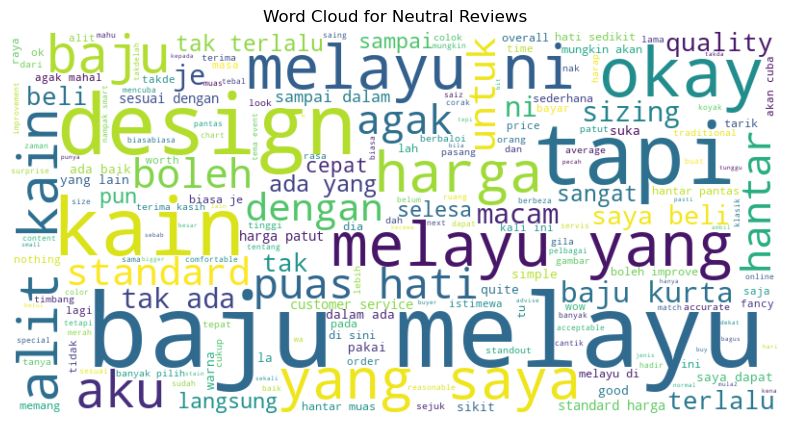

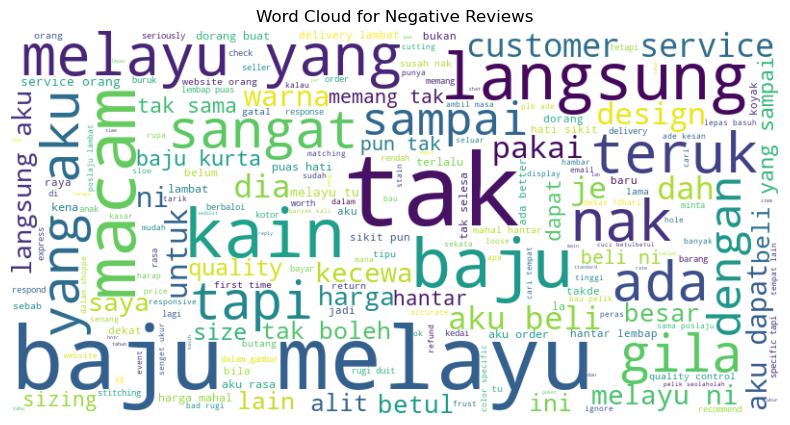

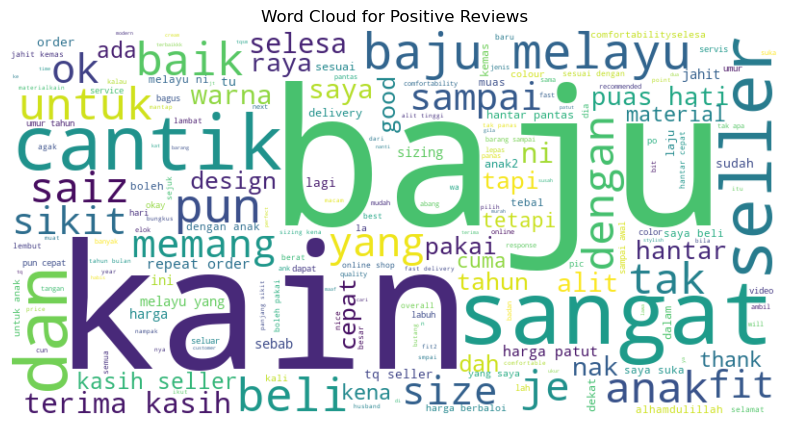

In [133]:
# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = combined_df[combined_df['Sentiment_Rating'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['ContractionReview'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = combined_df['Sentiment_Rating'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Save as CSV File</p>

In [134]:
# Create a DataFrame with only the desired columns
selected_columns = ['ContractionReview', 'Sentiment_Rating']
selected_data = combined_df[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Contraction Review & Sentiment Rating.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Contraction Review & Sentiment Rating.csv")


Selected columns saved to Contraction Review & Sentiment Rating.csv


In [135]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv', encoding='latin1')
finalData.head()

,ContractionReview,Sentiment_Rating
0,baju kurta sampai dalam ada baik tapi tak ada ...,Neutral
1,sizing tak accurate langsung aku rasa macam ba...,Negative
2,baju kurta aku dah koyak belum pakai memang ta...,Negative
3,delivery laju kain cantik thanks seller masih ...,Positive
4,baju selamat darat kain cantik dan sedap di pa...,Positive


In [136]:
finalData.isnull().any().any()

False

In [137]:
# Save the selected columns to a CSV file
finalData.to_csv('Contraction Review & Sentiment Rating.csv', index=False)



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Feature Engineering </p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">TF - IDF</p>

In [138]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(finalData['ContractionReview'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(finalData['ContractionReview'].astype('U'))
print(text_tf)

  (0, 1111)	0.4805921308798438
  (0, 1291)	0.19537186254349098
  (0, 1143)	0.1755819707600722
  (0, 1158)	0.23741537891735937
  (0, 108)	0.30202048294816947
  (0, 43)	0.5073805726624415
  (0, 314)	0.31654303711697324
  (0, 972)	0.24288468210341377
  (0, 601)	0.34792709981019126
  (0, 110)	0.12152695542404143
  (1, 937)	0.3970840487494454
  (1, 1299)	0.41062640208340523
  (1, 1008)	0.4272009030323343
  (1, 658)	0.23117884478161516
  (1, 919)	0.32423069811916416
  (1, 59)	0.19114363892310515
  (1, 619)	0.23251721075631407
  (1, 42)	0.37571580057574927
  (1, 1082)	0.2599810222311298
  (1, 1143)	0.15002033593835096
  (1, 110)	0.10383477642583559
  (2, 912)	0.320849776529202
  (2, 714)	0.29250378202043603
  (2, 828)	0.28118833924082703
  (2, 137)	0.4279887843035036
  :	:
  (459, 1232)	0.2776174186349003
  (459, 652)	0.2776174186349003
  (459, 1296)	0.23029177233272535
  (459, 724)	0.26015093069176654
  (459, 585)	0.2477582602758591
  (459, 553)	0.19082011200821794
  (459, 610)	0.17240682420


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Split Data</p>

In [139]:
finalData.isnull().any().any()

False

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Train-Test Split (assuming 'sentiment' is your target column)
X_train, X_test, y_train, y_test = train_test_split(finalData.drop('Sentiment_Rating', axis=1), finalData['Sentiment_Rating'], test_size=0.2)

# Print the shapes of training and testing sets
print("Number of samples in Training Set:", len(X_train))
print("Number of samples in Testing Set:", len(X_test))


Number of samples in Training Set: 369
Number of samples in Testing Set: 93


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [142]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(X_train)

In [143]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [144]:
# Pad sequences to have the same length
maxlen = 50
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')


In [145]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [146]:
# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)


In [147]:
# Assuming 'ContractionReview' column contains text data
text_data = finalData['ContractionReview']

In [148]:
nan_indices = []
for index, value in text_data.items():
  if pd.isna(value):
    nan_indices.append(index)

# Remove rows with NaN values (optional)
text_data = text_data.drop(nan_indices)

# Assuming text_data has been cleaned
tfidf_vectorizer = TfidfVectorizer()
text_matrix = tfidf_vectorizer.fit_transform(text_data)


In [149]:
y = finalData['Sentiment_Rating']
print(y)

0       Neutral
1      Negative
2      Negative
3      Positive
4      Positive
         ...   
457     Neutral
458    Negative
459    Negative
460    Positive
461    Negative
Name: Sentiment_Rating, Length: 462, dtype: object



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Training, Testing and Evaluation</p>


# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Supervised Learning</p>

In [150]:
finalData.columns

Index(['ContractionReview', 'Sentiment_Rating'], dtype='object')

In [151]:
finalData

,ContractionReview,Sentiment_Rating
0,baju kurta sampai dalam ada baik tapi tak ada ...,Neutral
1,sizing tak accurate langsung aku rasa macam ba...,Negative
2,baju kurta aku dah koyak belum pakai memang ta...,Negative
3,delivery laju kain cantik thanks seller masih ...,Positive
4,baju selamat darat kain cantik dan sedap di pa...,Positive
...,...,...
457,pada baju ada warna merah cuba basuh masih x h...,Neutral
458,colour a bit different from the picture and mo...,Negative
459,warna nude kita mintak warna lain yg smpai lpa...,Negative
460,tidak ikut saiz yg saya nak,Positive


In [152]:
finalData.dropna(subset=['ContractionReview', 'Sentiment_Rating'], inplace=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(finalData['ContractionReview'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)


## TF-IDF

In [154]:
#convert it into tf-idf 
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


print(X_train_tfidf)

  (0, 537)	0.30341859948245314
  (0, 1019)	0.46713698111871077
  (0, 1007)	0.19390348688636624
  (0, 371)	0.3699880058810949
  (0, 296)	0.3583218558562481
  (0, 293)	0.2843119166158589
  (0, 671)	0.25581764154493586
  (0, 115)	0.2611728806186322
  (0, 46)	0.25198305446096636
  (0, 1136)	0.22963074059399013
  (0, 622)	0.1932084117850174
  (0, 93)	0.1370894703499708
  (1, 486)	0.2798303666672143
  (1, 995)	0.3930465347181125
  (1, 962)	0.3930465347181125
  (1, 275)	0.2159101916749897
  (1, 856)	0.17709013810941118
  (1, 148)	0.2853283672910604
  (1, 1018)	0.17116199868028106
  (1, 187)	0.19223438179755903
  (1, 878)	0.2616525574136297
  (1, 1081)	0.24153037485623274
  (1, 296)	0.2285900003047282
  (1, 293)	0.3627513088787425
  (1, 115)	0.16661419861631602
  :	:
  (368, 726)	0.09840358593591222
  (368, 452)	0.1273351087519797
  (368, 439)	0.3008232435500273
  (368, 1057)	0.13409157700749075
  (368, 990)	0.11862450618805824
  (368, 897)	0.08691318181155246
  (368, 132)	0.12538097444356933



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machine (SVM)</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [161]:
#find the best parameter using Grid Search

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Instantiate SVM model
svm = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


ValueError: Found input variables with inconsistent numbers of samples: [1, 369]

In [160]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create the SVM model with the best parameters
best_svm_model = SVC(**best_params)

# Optionally, you can also include standard scaling if it was part of your pipeline
#best_svm_model = make_pipeline(StandardScaler(), best_svm_model)

# Train the best SVM model on your training data
best_svm_model.fit(x_train_tfidf, y_train)

#predict model
svm_predictions = best_svm_model.predict(x_test_tfidf)

NameError: name 'best_params' is not defined

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can specify other kernels as well, such as 'linear', 'poly', etc.

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print('The resulting accuracy using SVM is {:.2f}%'.format(100 * accuracy))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

The resulting accuracy using SVM is 86.02%
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.92      0.88        25
     Neutral       0.74      0.74      0.74        23
    Positive       0.93      0.89      0.91        45

    accuracy                           0.86        93
   macro avg       0.84      0.85      0.84        93
weighted avg       0.86      0.86      0.86        93




# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, svm_predictions)
precision_svm = precision_score(y_test, svm_predictions, average='micro')
recall_svm = recall_score(y_test, svm_predictions, average='micro')
f1_svm = f1_score(y_test, svm_predictions, average='micro')

print('SVM Model Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_svm))
print('Precision: {:.4f}'.format(precision_svm))
print('Recall: {:.4f}'.format(recall_svm))
print('F1 Score: {:.4f}'.format(f1_svm))



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>

In [ ]:
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train_padded, y_train_encoded)

# Predict on the testing data
rf_pred = rf_classifier.predict(X_test_padded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, rf_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test_encoded, rf_pred))



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_encoded, rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test_encoded, rf_pred)
precision_rf = precision_score(y_test_encoded, rf_pred, average='micro')
recall_rf = recall_score(y_test_encoded, rf_pred, average='micro')
f1_rf = f1_score(y_test_encoded, rf_pred, average='micro')

print('Random Forest Model Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_rf))
print('Precision: {:.4f}'.format(precision_rf))
print('Recall: {:.4f}'.format(recall_rf))
print('F1 Score: {:.4f}'.format(f1_rf))


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train_padded, y_train_encoded)

# Predict on the testing data
dt_pred = dt_classifier.predict(X_test_padded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, dt_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test_encoded, dt_pred))



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
# Generate confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test_encoded, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="cividis")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

accuracy_dt = accuracy_score(y_test_encoded, dt_pred)
precision_dt = precision_score(y_test_encoded, dt_pred, average='micro')
recall_dt = recall_score(y_test_encoded, dt_pred, average='micro')
f1_dt = f1_score(y_test_encoded, dt_pred, average='micro')

print('Decision Tree Classifier Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_dt))
print('Precision: {:.4f}'.format(precision_dt))
print('Recall: {:.4f}'.format(recall_dt))
print('F1 Score: {:.4f}'.format(f1_dt))


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Model</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

print("Best Parameters:", best_params)



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_

# Create a Logistic Regression model with the best parameters
best_logistic_regression = LogisticRegression(**best_params)

# Train the best Logistic Regression model on your training data
best_logistic_regression.fit(x_train_tfidf, y_train)

lr_predictions = best_logistic_regression.predict(x_test_tfidf)

In [ ]:
# Calculate performance metrics for SVM
accuracy_lr = accuracy_score(y_test, lr_predictions)
precision_lr = precision_score(y_test, lr_predictions, average='micro')
recall_lr = recall_score(y_test, lr_predictions, average='micro')
f1_lr = f1_score(y_test, lr_predictions, average='micro')

print('SVM Model Metrics:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr*100))
print('Precision : {:.2f} %'.format(precision_lr*100))
print('Recall    : {:.2f} %'.format(recall_lr*100))
print('F1 Score  : {:.2f} %'.format(f1_lr*100))


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, lr_predictions)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Instantiate Naive Bayes model
naive_bayes = MultinomialNB()

# Instantiate GridSearchCV
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Best parameters obtained from Grid Search
best_alpha = 0.5  

# Create Naive Bayes model with the best parameters
best_naive_bayes_model = MultinomialNB(alpha=best_alpha)

# Train the model on your training data
best_naive_bayes_model.fit(x_train_tfidf, y_train)

naive_bayes_predictions = best_naive_bayes_model.predict(x_test_tfidf)



In [ ]:

# Calculate performance metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, naive_bayes_predictions)
precision_nb = precision_score(y_test, naive_bayes_predictions, average='micro')
recall_nb = recall_score(y_test, naive_bayes_predictions, average='micro')
f1_nb = f1_score(y_test, naive_bayes_predictions, average='micro')

print('Naive Bayes Model Metrics:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb * 100))
print('Precision : {:.2f} %'.format(precision_nb * 100))
print('Recall    : {:.2f} %'.format(recall_nb * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb * 100))


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb = confusion_matrix(y_test, naive_bayes_predictions)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-NN</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create k-NN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)




# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Modeling</p>

In [ ]:
# Use the best model to make predictions
best_knn_model = grid_search.best_estimator_

knn_predictions = best_knn_model.predict(x_test_tfidf)

In [ ]:
# Calculate performance metrics for SVM
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions, average='micro')
recall_knn = recall_score(y_test, knn_predictions, average='micro')
f1_knn = f1_score(y_test, knn_predictions, average='micro')

print('KNN Model Metrics:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn * 100))
print('Precision : {:.2f} %'.format(precision_knn * 100))
print('Recall    : {:.2f} %'.format(recall_knn * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn * 100))


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Comparison Between Classification Model</p>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define model names and their accuracy scores
models = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_lr, accuracy_nb, accuracy_knn]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

# Plot the line graph
plt.plot(models, accuracies, marker='o', linestyle='-', color='black')

plt.show()

# Calculate performance metrics for Logistic Regression
precision_lr = precision_score(y_test, lr_predictions, average='micro')
recall_lr = recall_score(y_test, lr_predictions, average='micro')
f1_lr = f1_score(y_test, lr_predictions, average='micro')

print('Logistic Regression Model Metrics:')
print('Precision : {:.2f} %'.format(precision_lr*100))
print('Recall    : {:.2f} %'.format(recall_lr*100))
print('F1 Score  : {:.2f} %'.format(f1_lr*100))


# Calculate performance metrics for Naive Bayes
precision_nb = precision_score(y_test, naive_bayes_predictions, average='micro')
recall_nb = recall_score(y_test, naive_bayes_predictions, average='micro')
f1_nb = f1_score(y_test, naive_bayes_predictions, average='micro')

print('Naive Bayes Model Metrics:')
print('Precision : {:.2f} %'.format(precision_nb * 100))
print('Recall    : {:.2f} %'.format(recall_nb * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb * 100))

# Calculate performance metrics for KNN
precision_knn = precision_score(y_test, knn_predictions, average='micro')
recall_knn = recall_score(y_test, knn_predictions, average='micro')
f1_knn = f1_score(y_test, knn_predictions, average='micro')

print('KNN Model Metrics:')
print('Precision : {:.2f} %'.format(precision_knn * 100))
print('Recall    : {:.2f} %'.format(recall_knn * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn * 100))



# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Unsupervised Learning</p>


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Use Brain</p>

In [ ]:
from itertools import permutations

# Define the numbers
numbers = [2, 1, 0]

# Generate all permutations
perms = permutations(numbers)

# Print the permutations
for perm in perms:
    print(perm)

In [ ]:
# try all combination of 2,1,0 then find the highest score with confusion matrix
def SR_combination_1_(rating):
    if rating == 'Negative':
        return 2
    elif rating ==  'Neutral':
        return 1
    elif rating ==  'Positive':
        return 0
    else:
        return (-1)  

In [ ]:
def SR_combination_2_(rating):
    if rating == 'Negative':
        return 2
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [ ]:
def SR_combination_3_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 0
    else:
        return (-1) 

In [ ]:
def SR_combination_4_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 2
    else:
        return (-1) 

In [ ]:
def SR_combination_5_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [ ]:
def SR_combination_6_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 1
    elif rating == 'Positive':
        return 2
    else:
        return (-1)  

In [ ]:
finalData['SR_combination_1'] = finalData['Sentiment_Rating'].apply(SR_combination_1_)
finalData['SR_combination_2'] = finalData['Sentiment_Rating'].apply(SR_combination_2_)
finalData['SR_combination_3'] = finalData['Sentiment_Rating'].apply(SR_combination_3_)
finalData['SR_combination_4'] = finalData['Sentiment_Rating'].apply(SR_combination_4_)
finalData['SR_combination_5'] = finalData['Sentiment_Rating'].apply(SR_combination_5_)
finalData['SR_combination_6'] = finalData['Sentiment_Rating'].apply(SR_combination_6_)

In [ ]:
finalData


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Application for PCA</p>

In [ ]:
text_data = finalData['ContractionReview']

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_matrix_dense = tfidf_matrix.toarray()

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_dense)


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Elbow Method</p>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your data and 'pca_result' is the transformed data using PCA
inertia = []
k_max = 10  # Maximum number of clusters to consider

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, k_max + 1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-Means</p>

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'X' is your data
# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(pca_result)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Scatter Plot</p>

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(kmeans.labels_):
    cluster_points = pca_result[kmeans.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('KNN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# save as a column
finalData['knn_cluster_label'] = kmeans.labels_


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Interpret Result</p>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['knn_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Agglomerative</p>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters (optional, you can also let the model determine the optimal number of clusters)
n_clusters = 3

# Initialize the Agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data
agg_clustering.fit(pca_result)



In [ ]:
# Get cluster labels
cluster_labels = agg_clustering.labels_


# Print the cluster labels for each data point
print("Cluster Labels:")
print(agg_cluster_labels)



# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Scatter Plot</p>

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(agg_clustering.labels_):
    cluster_points = pca_result[agg_clustering.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# save as a column
finalData['aggg_cluster_label'] = agg_clustering.labels_


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Interpret Result</p>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['aggg_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Spectral</p>

In [ ]:
from sklearn.cluster import SpectralClustering

# Create Spectral clustering model
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to your data
spectral_clustering.fit(pca_result)

# Get the cluster labels
cluster_labels = spectral_clustering.labels_
# Print the cluster labels for each data point
print("Cluster Labels:")
print(agg_cluster_labels)


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Scatter Plot</p>

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(spectral_clustering.labels_):
    cluster_points = pca_result[spectral_clustering.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# save as a column
finalData['spec_cluster_label'] = spectral_clustering.labels_


# <p style="padding:10px;background-color:lightgreen;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Interpret Result</p>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['spec_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Sentiment Analysis</p>

##### After Model Training, Testing and Evaluation, appropriate sentimer analysis model that effectively handle the Sentiment Reviews & Ratings is --- with highest accuracy of --- %.